In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import datetime
import epiweeks

# Read CSV

In [3]:
casos_Colombia = pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv')
casos_Colombia.head(3)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2021-03-04 00:00:00,2265685,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,49,1,M,...,NaN,NaN,Recuperado,2021-02-25 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6.0,NaN
1,2021-03-04 00:00:00,2265686,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,49,1,M,...,NaN,NaN,Recuperado,2021-02-23 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6.0,NaN
2,2021-03-04 00:00:00,2265687,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,51,1,F,...,NaN,NaN,Recuperado,2021-02-24 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6.0,NaN


fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                28642
Estado                            28642
Código ISO del país             6090005
Nombre del país                 6089997
Recuperado                        24204
Fecha de inicio de síntomas      489491
Fecha de muerte                 5925194
Fecha de diagnóstico               2755
Fecha de recuperación            166569
Tipo de recuperación             166569
Pertenencia étnica                  978
Nombre del grupo étnico         6012415
dtype: int64

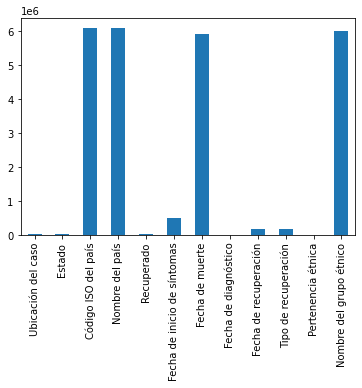

In [4]:
# Null values
casos_Colombia.isna().sum()[casos_Colombia.isna().sum()>0].plot(kind='bar')
casos_Colombia.isna().sum()

# Filter Columns

In [5]:
print(f'The columns are:')
print(casos_Colombia.columns.values)

The columns are:
['fecha reporte web' 'ID de caso' 'Fecha de notificación'
 'Código DIVIPOLA departamento' 'Nombre departamento'
 'Código DIVIPOLA municipio' 'Nombre municipio' 'Edad'
 'Unidad de medida de edad' 'Sexo' 'Tipo de contagio' 'Ubicación del caso'
 'Estado' 'Código ISO del país' 'Nombre del país' 'Recuperado'
 'Fecha de inicio de síntomas' 'Fecha de muerte' 'Fecha de diagnóstico'
 'Fecha de recuperación' 'Tipo de recuperación' 'Pertenencia étnica'
 'Nombre del grupo étnico']


In [6]:
columns = ['fecha reporte web', 'ID de caso', 'Fecha de notificación', 'Código DIVIPOLA municipio',
           'Fecha de inicio de síntomas', 'Fecha de muerte', 'Fecha de diagnóstico', 'Código DIVIPOLA departamento'
           #'Edad', 'Unidad de medida de edad', 'Sexo', 'Tipo de contagio','Tipo de recuperación', 'Fecha de recuperación', 'Estado',
           ]

casos_Colombia = casos_Colombia[columns]
casos_Colombia.head(3)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA municipio,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Código DIVIPOLA departamento
0,2021-03-04 00:00:00,2265685,2021-03-02 00:00:00,11001,2021-02-25 00:00:00,NaN,2021-03-03 00:00:00,11
1,2021-03-04 00:00:00,2265686,2021-03-02 00:00:00,11001,2021-02-23 00:00:00,NaN,2021-03-03 00:00:00,11
2,2021-03-04 00:00:00,2265687,2021-03-02 00:00:00,11001,2021-02-24 00:00:00,NaN,2021-03-03 00:00:00,11


# Check unique values

In [7]:
rows = casos_Colombia.shape[0]
print(f'The number of cases is: {rows}')

unique_ids = pd.unique(casos_Colombia['ID de caso']).shape[0]
print(f'The number of unique ids are: {unique_ids}')

casos_Colombia.drop(columns=['ID de caso'], inplace=True)

The number of cases is: 6093645
The number of unique ids are: 6093645


# Covid deaths

In [8]:
# Get Columns:
covid_deaths_columns = ['Código DIVIPOLA municipio','Fecha de muerte']
covid_deaths = casos_Colombia[covid_deaths_columns]
# Drop null values
covid_deaths = covid_deaths[covid_deaths['Fecha de muerte'].notna()]
covid_deaths.isnull().sum()

Código DIVIPOLA municipio    0
Fecha de muerte              0
dtype: int64

In [9]:
# Use pandas.to_datetime() to convert string to datetime format
covid_deaths['Fecha de muerte'] = pd.to_datetime(covid_deaths['Fecha de muerte'])
covid_deaths.dtypes

Código DIVIPOLA municipio             int64
Fecha de muerte              datetime64[ns]
dtype: object

In [10]:
covid_deaths.head(3)

,Código DIVIPOLA municipio,Fecha de muerte
28,5001,2021-01-25
48,18001,2020-09-06
55,76001,2020-09-04


# Covid Cases

In [11]:
# Get Columns:
covid_cases_columns = ['Código DIVIPOLA municipio','Fecha de notificación']
covid_cases = casos_Colombia[covid_cases_columns]
covid_cases.isnull().sum()

Código DIVIPOLA municipio    0
Fecha de notificación        0
dtype: int64

In [12]:
# Use pandas.to_datetime() to convert string to datetime format
covid_cases['Fecha de notificación'] = pd.to_datetime(covid_cases['Fecha de notificación'])
covid_cases.dtypes

Código DIVIPOLA municipio             int64
Fecha de notificación        datetime64[ns]
dtype: object

In [13]:
covid_cases.head(3)

,Código DIVIPOLA municipio,Fecha de notificación
0,11001,2021-03-02
1,11001,2021-03-02
2,11001,2021-03-02


# Convert dataframe to timeseries

In [14]:
# Covid cases in time
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='blue')
    plt.xlabel(x_label) 
    plt.ylabel('Covid Cases')
    plt.show()


In [15]:
def get_epiweek_df(df, dates):
    
    # Get first and last epiweek:
    first_week = epiweeks.Week.fromdate(dates.min())
    last_week = epiweeks.Week.fromdate(dates.max())
    
    complete_dates = np.arange(first_week.startdate(), last_week.enddate() + timedelta(days=7), timedelta(days=7)).astype('datetime64[D]')
    complete_dates = complete_dates.astype(datetime.date)
    
    epiweek_df = pd.DataFrame()
    
    for date in zip(complete_dates, complete_dates[1:]):
        
        first_date = date[0]
        last_date = date[1] - timedelta(days=1)
        actual_epiweek = epiweeks.Week.fromdate(first_date)      
        
        if actual_epiweek == first_week:
            week_dates = np.arange(dates.min(), last_date, timedelta(days=1)).astype('datetime64[D]')
            week_dates = week_dates.astype(datetime.date)
            
        elif actual_epiweek == last_week:
            week_dates = np.arange(first_date, dates.max(), timedelta(days=1)).astype('datetime64[D]')
            week_dates = week_dates.astype(datetime.date)
            
        else:
            week_dates = np.arange(first_date, last_date, timedelta(days=1)).astype('datetime64[D]')
            week_dates = week_dates.astype(datetime.date)
        
        epiweek_df[actual_epiweek] = df.loc[:,week_dates].sum(axis=1)
        
    return epiweek_df

In [16]:
def dataframe_to_timeseries(df, column_date, time_inverval=1, epi_week = False):
    # Add cases column:
    df['Cases'] = 1
    
    # Print Colombian time series:
    df_colombia = df.groupby([df[column_date].dt.date])['Cases'].sum()
    timeseries(df_colombia.index, df_colombia.values, 'Cases by Week in Colombia')
    
    df['Municipality_Code'] = df['Código DIVIPOLA municipio']
    df = df.drop(columns=['Código DIVIPOLA municipio'])
    
    # Group by date and number of cases
    df = df.groupby([df[column_date].dt.date, 'Municipality_Code'])['Cases'].sum()
    # Unstack index (column_date)
    ## Get position of the dates in index
    position_index = df.index.names.index(column_date)
    df = df.unstack(position_index)
    # Add ceros (No cases)
    df = df.fillna(0)
    
    dates = df.columns.values
    
    print(f'The first date is: {dates.min()}')
    print(f'The last date is: {dates.max()}')
    
    #print(f'The numer of dates is: {dates.shape[0]}')
    complete_dates = np.arange(dates.min(), dates.max(), timedelta(days=1)).astype('datetime64[D]')
    complete_dates = complete_dates.astype(datetime.date)
    print(f'The numer of dates should be: {complete_dates.shape[0] + 1}')

    # Append columns with no cases
    if dates.shape[0] < complete_dates.shape[0]:
        for date in complete_dates:
            if date not in dates:
                df[date] = 0.0
                #print(f'The date: {date} is not in the dataframe')
        # Sort columns
        df = df.sort_index(axis=1)
    
    if time_inverval == 1:
        df.columns.name = None
    
    # Weekly use epiweek:
    if epi_week:
        first_week = epiweeks.Week.fromdate(dates.min())
        print(f'The first epiweek is: {first_week.week},{first_week.year}')
        last_week = epiweeks.Week.fromdate(dates.max())
        print(f'The last epiweek is: {last_week.week},{last_week.year}')

        epiweek_df = get_epiweek_df(df, complete_dates)
        
        return df, epiweek_df
    
    return df

# Generate daily and weekly covid deaths by Municipality

In [17]:
out_dir = 'output_datasets'

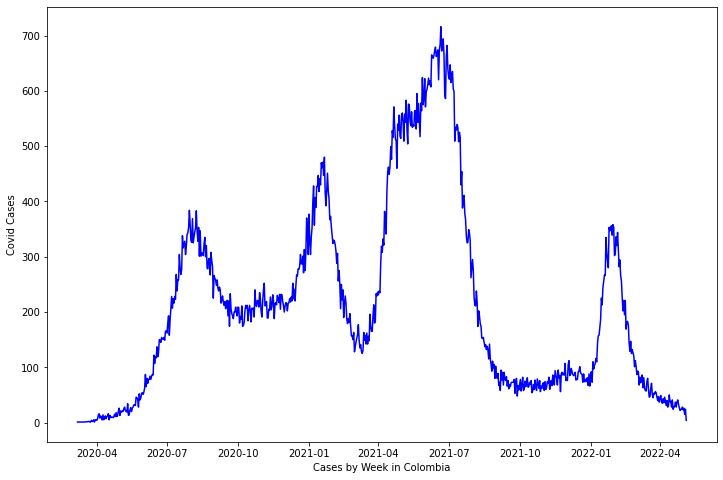

The first date is: 2020-03-07
The last date is: 2022-05-05
The numer of dates should be: 790
The first epiweek is: 10,2020
The last epiweek is: 18,2022


,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,...,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05
Municipality_Code,,,,,,,,,,,,,,,,,,,,,
5001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,3.0,1.0,5.0,1.0,2.0,1.0,1.0,0.0
5002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_deaths, epiweek_deaths = dataframe_to_timeseries(df=covid_deaths, column_date="Fecha de muerte", time_inverval=1, epi_week=True)
df_deaths.to_csv('./' + out_dir + '/daily_covid_deaths_by_municipality.csv',index=True)
df_deaths

In [19]:
epiweek_deaths.to_csv('./' + out_dir + '/weekly_covid_deaths_by_municipality.csv',index=True)
epiweek_deaths

,202010,202011,202012,202013,202014,202015,202016,202017,202018,202019,...,202209,202210,202211,202212,202213,202214,202215,202216,202217,202218
Municipality_Code,,,,,,,,,,,,,,,,,,,,,
5001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,35.0,25.0,29.0,18.0,18.0,22.0,18.0,18.0,11.0,4.0
5002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Generate daily and weekly covid cases by Municipality

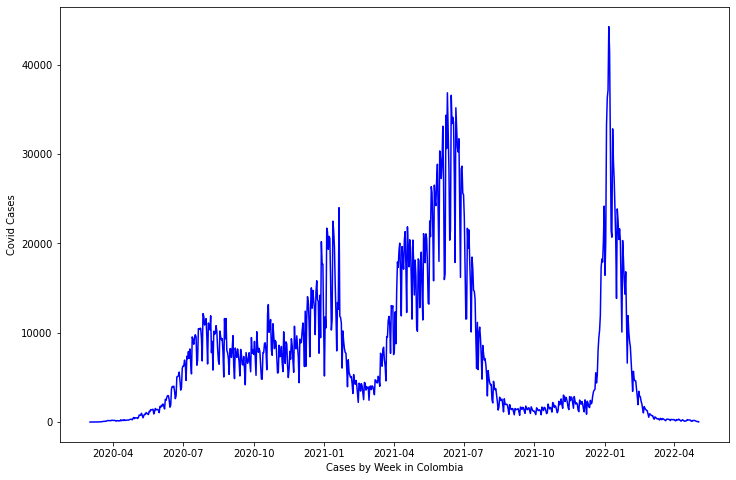

The first date is: 2020-03-02
The last date is: 2022-05-03
The numer of dates should be: 793
The first epiweek is: 10,2020
The last epiweek is: 18,2022


,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03
Municipality_Code,,,,,,,,,,,,,,,,,,,,,
5001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,...,6.0,28.0,23.0,32.0,23.0,4.0,2.0,2.0,1.0,0.0
5002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_cases, epiweek_cases = dataframe_to_timeseries(df=covid_cases, column_date='Fecha de notificación', time_inverval=1, epi_week=True)
df_cases.to_csv('./' + out_dir + '/daily_covid_cases_by_municipality.csv',index=True)
df_cases

In [21]:
epiweek_cases.to_csv('./' + out_dir + '/weekly_covid_cases_by_municipality.csv',index=True)
epiweek_cases

,202010,202011,202012,202013,202014,202015,202016,202017,202018,202019,...,202209,202210,202211,202212,202213,202214,202215,202216,202217,202218
Municipality_Code,,,,,,,,,,,,,,,,,,,,,
5001,0.0,6.0,31.0,37.0,45.0,29.0,50.0,40.0,20.0,21.0,...,275.0,204.0,152.0,144.0,125.0,139.0,86.0,146.0,116.0,2.0
5002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
99524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Generate Department and country dataframe

In [22]:
def dataframe_to_timeseries_department(df, column_date, time_inverval=1, epi_week = False):
    # Add cases column:
    df['Cases'] = 1
    
    # Print Colombian time series:
    df_colombia = df.groupby([df[column_date].dt.date])['Cases'].sum()
    timeseries(df_colombia.index, df_colombia.values, 'Cases by Week in Colombia')
    df_colombia = pd.DataFrame(df_colombia)
    df_colombia.columns = ['Cases']
    
    # Convert municipality code to department code
    df['Department_Code'] = df['Código DIVIPOLA municipio'].apply(lambda x: int(str(x)[:-3]))
    df = df.drop(columns=['Código DIVIPOLA municipio'])
    
    # Group by date and number of cases
    df = df.groupby([df[column_date].dt.date, 'Department_Code'])['Cases'].sum()
    # Unstack index (column_date)
    ## Get position of the dates in index
    position_index = df.index.names.index(column_date)
    df = df.unstack(position_index)
    # Add ceros (No cases)
    df = df.fillna(0)
    
    dates = df.columns.values
    
    print(f'The first date is: {dates.min()}')
    print(f'The last date is: {dates.max()}')
    
    #print(f'The numer of dates is: {dates.shape[0]}')
    complete_dates = np.arange(dates.min(), dates.max(), timedelta(days=1)).astype('datetime64[D]')
    complete_dates = complete_dates.astype(datetime.date)
    print(f'The numer of dates should be: {complete_dates.shape[0] + 1}')

    # Append columns with no cases
    if dates.shape[0] < complete_dates.shape[0]:
        for date in complete_dates:
            if date not in dates:
                df[date] = 0.0
                #print(f'The date: {date} is not in the dataframe')
        # Sort columns
        df = df.sort_index(axis=1)
    
    if time_inverval == 1:
        df.columns.name = None
    
    # Weekly use epiweek:
    if epi_week:
        first_week = epiweeks.Week.fromdate(dates.min())
        print(f'The first epiweek is: {first_week.week},{first_week.year}')
        last_week = epiweeks.Week.fromdate(dates.max())
        print(f'The last epiweek is: {last_week.week},{last_week.year}')

        epiweek_df = get_epiweek_df(df, complete_dates)
        
        return df, epiweek_df, df_colombia
    
    return df, df_colombia

# Generate daily and weekly covid deaths by Department

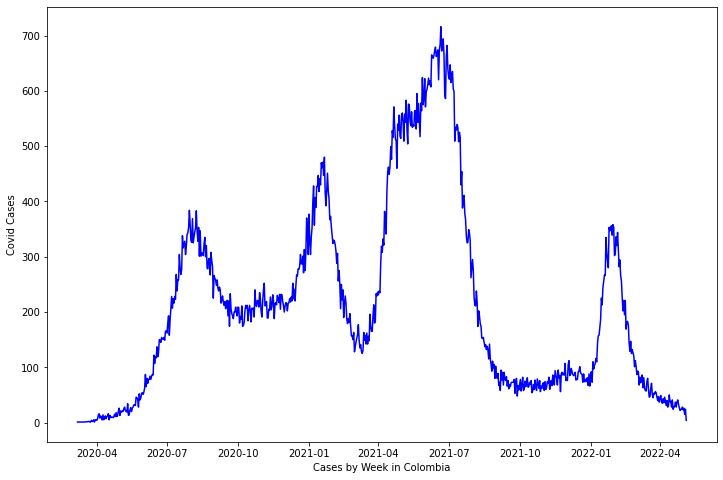

The first date is: 2020-03-07
The last date is: 2022-05-05
The numer of dates should be: 790
The first epiweek is: 10,2020
The last epiweek is: 18,2022


,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,...,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05
Department_Code,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,3.0,2.0,5.0,1.0,3.0,2.0,2.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,6.0,8.0,3.0,6.0,7.0,2.0,6.0,1.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [23]:
df_deaths, epiweek_deaths, df_colombia_deaths = dataframe_to_timeseries_department(df=covid_deaths, column_date="Fecha de muerte", time_inverval=1, epi_week=True)
df_deaths.to_csv('./' + out_dir + '/daily_covid_deaths_by_department.csv',index=True)
df_deaths

In [24]:
epiweek_deaths.to_csv('./' + out_dir + '/weekly_covid_deaths_by_department.csv',index=True)
epiweek_deaths

,202010,202011,202012,202013,202014,202015,202016,202017,202018,202019,...,202209,202210,202211,202212,202213,202214,202215,202216,202217,202218
Department_Code,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,51.0,39.0,42.0,34.0,31.0,33.0,29.0,24.0,18.0,6.0
8,0.0,0.0,0.0,1.0,3.0,2.0,0.0,3.0,11.0,21.0,...,20.0,28.0,17.0,12.0,17.0,9.0,13.0,6.0,10.0,5.0
11,0.0,0.0,0.0,3.0,14.0,24.0,19.0,21.0,32.0,24.0,...,138.0,114.0,88.0,65.0,71.0,53.0,52.0,43.0,36.0,15.0
13,0.0,0.0,1.0,1.0,3.0,4.0,6.0,6.0,9.0,24.0,...,6.0,7.0,4.0,11.0,7.0,8.0,9.0,5.0,3.0,1.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,16.0,15.0,9.0,13.0,4.0,4.0,4.0,5.0,6.0,3.0
17,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,16.0,9.0,12.0,6.0,2.0,4.0,3.0,6.0,5.0,3.0
18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,7.0,6.0,2.0,2.0,3.0,1.0,1.0,0.0,1.0
19,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,7.0,5.0,4.0,6.0,5.0,2.0,5.0,4.0,3.0,2.0
20,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,4.0,...,12.0,10.0,6.0,6.0,3.0,5.0,3.0,2.0,4.0,1.0


In [25]:
df_colombia_deaths = pd.DataFrame(df_deaths.sum(axis=0))
df_colombia_deaths.index.name = 'epiweek'
df_colombia_deaths.columns = ['Cases']

df_colombia_deaths.to_csv('./' + out_dir + '/daily_covid_deaths_in_Colombia.csv',index=True)
df_colombia_deaths

,Cases
epiweek,
2020-03-07,1.0
2020-03-08,0.0
2020-03-09,0.0
2020-03-10,0.0
2020-03-11,0.0
...,...
2022-05-01,23.0
2022-05-02,26.0
2022-05-03,15.0


In [26]:
df_colombia_deaths_weekly = pd.DataFrame(epiweek_deaths.sum(axis=0))
df_colombia_deaths_weekly.index.name = 'epiweek'
df_colombia_deaths_weekly.columns = ['Cases']
df_colombia_deaths_weekly.to_csv('./' + out_dir + '/weekly_covid_deaths_in_Colombia.csv',index=True)
df_colombia_deaths_weekly

,Cases
epiweek,
202010,0.0
202011,0.0
202012,2.0
202013,13.0
202014,36.0
...,...
202214,235.0
202215,224.0
202216,187.0


# Generate daily and weekly covid cases by Department

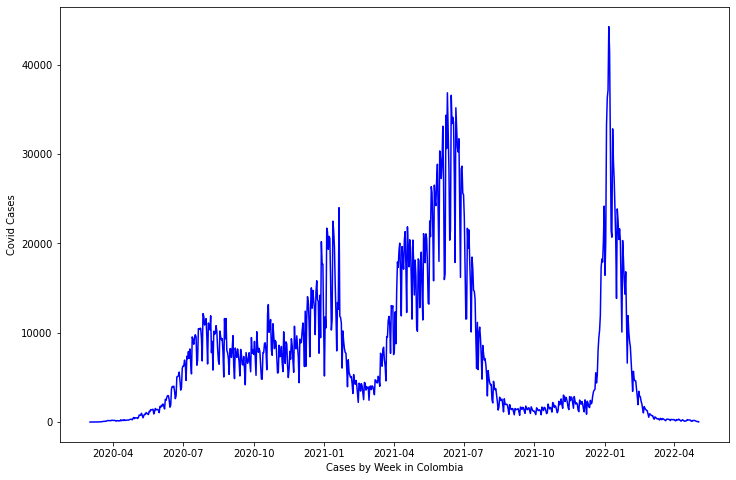

The first date is: 2020-03-02
The last date is: 2022-05-03
The numer of dates should be: 793
The first epiweek is: 10,2020
The last epiweek is: 18,2022


,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03
Department_Code,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,...,11.0,35.0,37.0,41.0,30.0,5.0,4.0,2.0,3.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,8.0,13.0,6.0,9.0,3.0,0.0,3.0,0.0
11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,...,46.0,83.0,74.0,90.0,87.0,91.0,51.0,45.0,41.0,2.0
13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_cases, epiweek_cases,df_colombia_cases  = dataframe_to_timeseries_department(df=covid_cases, column_date='Fecha de notificación', time_inverval=1, epi_week=True)
df_cases.to_csv('./' + out_dir + '/daily_covid_cases_by_department.csv',index=True)
df_cases

In [28]:
epiweek_cases.to_csv('./' + out_dir + '/weekly_covid_cases_by_department.csv',index=True)
epiweek_cases

,202010,202011,202012,202013,202014,202015,202016,202017,202018,202019,...,202209,202210,202211,202212,202213,202214,202215,202216,202217,202218
Department_Code,,,,,,,,,,,,,,,,,,,,,
5,0.0,8.0,50.0,61.0,76.0,45.0,70.0,61.0,29.0,34.0,...,394.0,275.0,196.0,200.0,173.0,190.0,113.0,209.0,159.0,2.0
8,0.0,0.0,9.0,39.0,34.0,24.0,54.0,89.0,448.0,1107.0,...,116.0,44.0,45.0,51.0,73.0,72.0,41.0,61.0,52.0,0.0
11,1.0,19.0,93.0,355.0,538.0,378.0,471.0,614.0,727.0,869.0,...,2397.0,1403.0,1137.0,813.0,814.0,791.0,420.0,587.0,471.0,45.0
13,0.0,3.0,15.0,25.0,44.0,33.0,73.0,63.0,149.0,443.0,...,73.0,35.0,13.0,29.0,25.0,39.0,41.0,39.0,10.0,0.0
15,0.0,0.0,0.0,5.0,23.0,1.0,2.0,4.0,16.0,26.0,...,94.0,33.0,19.0,23.0,12.0,14.0,20.0,24.0,0.0,0.0
17,0.0,1.0,6.0,6.0,15.0,11.0,9.0,6.0,29.0,9.0,...,18.0,10.0,19.0,8.0,9.0,2.0,2.0,10.0,3.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,6.0,5.0,...,54.0,21.0,12.0,10.0,13.0,1.0,0.0,0.0,1.0,0.0
19,0.0,0.0,2.0,7.0,4.0,4.0,1.0,12.0,9.0,17.0,...,40.0,28.0,24.0,18.0,10.0,11.0,8.0,9.0,13.0,0.0
20,0.0,0.0,1.0,12.0,14.0,3.0,13.0,14.0,8.0,0.0,...,28.0,8.0,15.0,13.0,16.0,9.0,7.0,17.0,0.0,0.0


In [29]:
df_colombia_cases = pd.DataFrame(df_cases.sum(axis=0))
df_colombia_cases.index.name = 'epiweek'
df_colombia_cases.columns = ['Cases']
df_colombia_cases.to_csv('./' + out_dir + '/daily_covid_cases_in_Colombia.csv',index=True)
df_colombia_cases

,Cases
epiweek,
2020-03-02,1.0
2020-03-03,1.0
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,1.0
...,...
2022-04-29,125.0
2022-04-30,74.0
2022-05-01,53.0


In [30]:
df_colombia_cases_weekly = pd.DataFrame(epiweek_cases.sum(axis=0))
df_colombia_cases_weekly.index.name = 'epiweek'
df_colombia_cases_weekly.columns = ['Cases']
df_colombia_cases_weekly.to_csv('./' + out_dir + '/weekly_covid_cases_in_Colombia.csv',index=True)
df_colombia_cases_weekly

,Cases
epiweek,
202010,3.0
202011,41.0
202012,282.0
202013,797.0
202014,1072.0
...,...
202214,1448.0
202215,930.0
202216,1315.0
